In [2]:
from task.model_v005 import HPE, HeatmapLoss, lr_scheduler
from data.dp import Dataset
import tensorflow as tf
import matplotlib.pyplot as plt
import os
print(tf.config.list_physical_devices('GPU'))

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
model = HPE()

In [3]:
# checkpoint

checkpoint_path = "data/checkpoint_v005/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq='epoch')

model.save_weights(checkpoint_path.format(epoch=0))

In [4]:
INPUT_RES = 256
OUTPUT_RES = 64
NUM_PARTS = 16
TRAIN_FILE = 'train.h5'
VALID_FILE = 'valid.h5'
BATCH_SIZE = 16

t_ds = Dataset(INPUT_RES, OUTPUT_RES, NUM_PARTS, TRAIN_FILE)
v_ds = Dataset(INPUT_RES, OUTPUT_RES, NUM_PARTS, VALID_FILE)
train = t_ds.tf_dataset_from_generator(BATCH_SIZE)
valid = v_ds.tf_dataset_from_generator(BATCH_SIZE)

loading data: train.h5
Done (t=3.27s)
loading data: valid.h5
Done (t=0.43s)


In [5]:
lr = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

In [6]:
hist = model.fit(train.take(1400), validation_data=valid.take(190), callbacks=[lr, cp_callback], epochs=50)

Epoch 1/50
1400/1400 [==============================] - 854s 594ms/step - loss: 0.0210 - val_loss: 8.7988e-04

Epoch 00001: saving model to data/checkpoint_Conv2dT_4/cp-0001.ckpt
Epoch 2/50
1400/1400 [==============================] - 835s 597ms/step - loss: 0.0026 - val_loss: 0.0398

Epoch 00002: saving model to data/checkpoint_Conv2dT_4/cp-0002.ckpt
Epoch 3/50
1400/1400 [==============================] - 834s 596ms/step - loss: 0.0023 - val_loss: 0.0013

Epoch 00003: saving model to data/checkpoint_Conv2dT_4/cp-0003.ckpt
Epoch 4/50
1400/1400 [==============================] - 834s 596ms/step - loss: 0.0017 - val_loss: 7.1841e-04

Epoch 00004: saving model to data/checkpoint_Conv2dT_4/cp-0004.ckpt
Epoch 5/50
1400/1400 [==============================] - 833s 595ms/step - loss: 5.8290e-04 - val_loss: 7.0167e-04

Epoch 00005: saving model to data/checkpoint_Conv2dT_4/cp-0005.ckpt
Epoch 6/50
1400/1400 [==============================] - 833s 595ms/step - loss: 5.5157e-04 - val_loss: 6.9665

In [ ]:
split = text.split()

In [25]:
loss = []
val_loss = []
for i, word in enumerate(split):
    if word == 'loss:':
        loss.append(split[i+1])
    if word == 'val_loss:':
        val_loss.append(split[i+1])

In [26]:
print(len(loss), loss)
print(len(val_loss), val_loss)

50 ['0.0167', '7.0976e-04', '7.0141e-04', '6.9979e-04', '6.9464e-04', '6.8450e-04', '6.6742e-04', '6.3766e-04', '6.0917e-04', '5.8350e-04', '5.5718e-04', '5.3403e-04', '5.1418e-04', '5.0008e-04', '4.8478e-04', '4.7516e-04', '4.6728e-04', '4.5836e-04', '4.5070e-04', '4.4624e-04', '4.1794e-04', '4.0883e-04', '4.0340e-04', '4.0305e-04', '3.9808e-04', '3.9969e-04', '3.9708e-04', '3.9498e-04', '3.9160e-04', '3.9061e-04', '3.8892e-04', '3.8618e-04', '3.8819e-04', '3.8660e-04', '3.8564e-04', '3.8791e-04', '3.8479e-04', '3.8544e-04', '3.8361e-04', '3.8365e-04', '3.8432e-04', '3.8454e-04', '3.8473e-04', '3.8207e-04', '3.8268e-04', '3.8667e-04', '3.8304e-04', '3.8300e-04', '3.8430e-04', '3.8352e-04']
50 ['7.5666e-04', '7.1974e-04', '7.4031e-04', '7.5497e-04', '0.0015', '0.0012', '6.7621e-04', '6.2701e-04', '5.9090e-04', '6.4839e-04', '5.7269e-04', '5.8684e-04', '5.1554e-04', '5.9516e-04', '5.5749e-04', '4.7619e-04', '7.8448e-04', '0.0012', '5.8313e-04', '0.0043', '4.3929e-04', '4.4352e-04', '4.3

In [16]:
import numpy as np
loss = np.array(loss).astype(np.float64)
print(loss)

[0.0167     0.00070976 0.00070141 0.00069979 0.00069464 0.0006845
 0.00066742 0.00063766 0.00060917 0.0005835  0.00055718 0.00053403
 0.00051418 0.00050008 0.00048478 0.00047516 0.00046728 0.00045836
 0.0004507  0.00044624 0.00041794 0.00040883 0.0004034  0.00040305
 0.00039808 0.00039969 0.00039708 0.00039498 0.0003916  0.00039061
 0.00038892 0.00038618 0.00038819 0.0003866  0.00038564 0.00038791
 0.00038479 0.00038544 0.00038361 0.00038365 0.00038432 0.00038454
 0.00038473 0.00038207 0.00038268 0.00038667 0.00038304 0.000383
 0.0003843  0.00038352]


In [17]:
val_loss = np.array(val_loss).astype(np.float64)
print(val_loss)

[0.00075666 0.00071974 0.00074031 0.00075497 0.0015     0.0012
 0.00067621 0.00062701 0.0005909  0.00064839 0.00057269 0.00058684
 0.00051554 0.00059516 0.00055749 0.00047619 0.00078448 0.0012
 0.00058313 0.0043     0.00043929 0.00044352 0.00043267 0.00042301
 0.00042128 0.00043424 0.00041976 0.00041153 0.00041327 0.00041583
 0.00040235 0.00039975 0.00040077 0.00040056 0.0003991  0.00040144
 0.00039964 0.00040133 0.00040133 0.00040027 0.00040038 0.00039867
 0.00040045 0.00040059 0.00039865 0.00040041 0.00040067 0.00039898
 0.00039976 0.00039843]


In [13]:
loss = '''
0.0167     0.00070976 0.00070141 0.00069979 0.00069464 0.0006845
 0.00066742 0.00063766 0.00060917 0.0005835  0.00055718 0.00053403
 0.00051418 0.00050008 0.00048478 0.00047516 0.00046728 0.00045836
 0.0004507  0.00044624 0.00041794 0.00040883 0.0004034  0.00040305
 0.00039808 0.00039969 0.00039708 0.00039498 0.0003916  0.00039061
 0.00038892 0.00038618 0.00038819 0.0003866  0.00038564 0.00038791
 0.00038479 0.00038544 0.00038361 0.00038365 0.00038432 0.00038454
 0.00038473 0.00038207 0.00038268 0.00038667 0.00038304 0.000383
 0.0003843  0.00038352
'''
val_loss = '''
0.00075666 0.00071974 0.00074031 0.00075497 0.0015     0.0012
 0.00067621 0.00062701 0.0005909  0.00064839 0.00057269 0.00058684
 0.00051554 0.00059516 0.00055749 0.00047619 0.00078448 0.0012
 0.00058313 0.0043     0.00043929 0.00044352 0.00043267 0.00042301
 0.00042128 0.00043424 0.00041976 0.00041153 0.00041327 0.00041583
 0.00040235 0.00039975 0.00040077 0.00040056 0.0003991  0.00040144
 0.00039964 0.00040133 0.00040133 0.00040027 0.00040038 0.00039867
 0.00040045 0.00040059 0.00039865 0.00040041 0.00040067 0.00039898
 0.00039976 0.00039843
'''

In [14]:
loss = loss.split()
val_loss = val_loss.split()

50

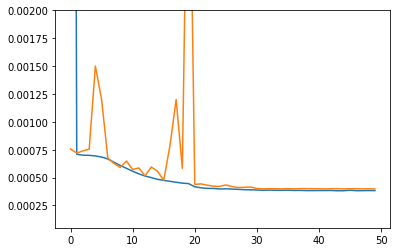

In [38]:
plt.ylim([0.00005, 0.002])
plt.plot(range(50), loss)
plt.plot(range(50), val_loss)

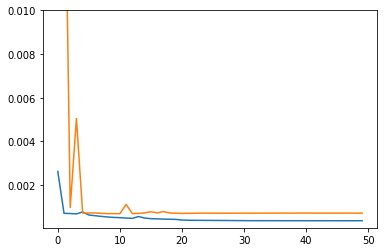

In [7]:
plt.ylim(0.00005, 0.01)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [11]:
import csv

In [12]:
with open('data/ct.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(hist.history['loss'])
    writer.writerow(hist.history['val_loss'])

In [18]:
with open('data/nu.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(loss)
    writer.writerow(val_loss)